## Wine Quality Prediction

Involves the quality of wine prediction, and is recognized as one of the most popular beginner level Machine Learning project.

Let's begin by first importing the necessary libraries.
Don't get overwhelmed with so many imports at the very top. Its just my habit to keep on coming back and import the libraries as I work on my project.

In [169]:
#importing the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score

Now we shall begin our task by importing the dataset necessary.

## Step 1: Importing the Dataset

The dataset involved is gathered from https://www.kaggle.com/rajyellow46/wine-quality .

I have downloaded the dataset in my local drive and have stored it as a csv file as 'winequality.csv' for ease of use. Lets first load the dataset and start working.

In [74]:
wine_df = pd.read_csv('winequality.csv')

wine_df.head() #to display the first five rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
len(wine_df.columns)

12

The dataframe involves 12 columns out of which **11 are features and 1 is the desired output(quality)**

## Step 2 : Data Analysis

Most knowledge about the data can be determined through thorough understanding of the data.

But for a thorough understanding the basic informations are needed and can be recognized via:
1. .shape --> for shape of dataset
2. .info --> basic information of dataset
3. .describe --> basic statistical summary of the features

In [76]:
wine_df.shape

(1599, 12)

So there are basically 1599 data entries and 11 features and 1 target.

In [77]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Okay. It is very nice to see that there is no Object datatype available and is very nice for us to implement into a ML algorithm.

In [78]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Okay, so the basic information describes a lot about the dataset. 
A nice thing is that the count of all the features are 1599, which is equivalent to the original number of samples and hence reckons no missing values. We are still going to check if there are no missing values next.

**Checking for missing values**

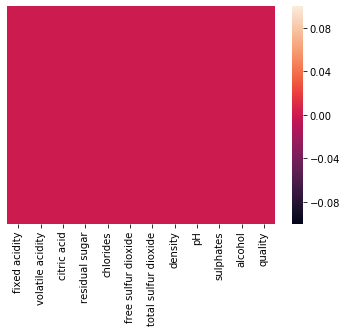

In [79]:
sns.heatmap(wine_df.isnull() , 
            yticklabels = False)

plt.show()

Yes. No missing values!

Lets now first separate out the target from the features.

In [80]:
y = wine_df['quality']
X = wine_df.drop(['quality'] , axis = 1)

In [81]:
X #displaying the features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Now lets see if there are any features which are basically categorical.

In [82]:
cat_var = [feature for feature in X.columns if len(wine_df[feature].unique()) < 25]

cat_var

[]

The result shows the empty list, hence, depicting all the features are numeric.

Since all of them are numeric lets visualize their histograms and check their respective skewness. 

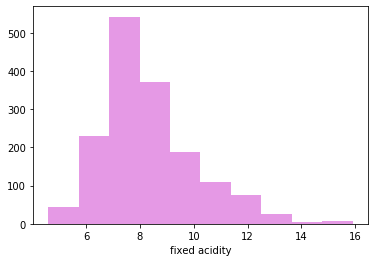

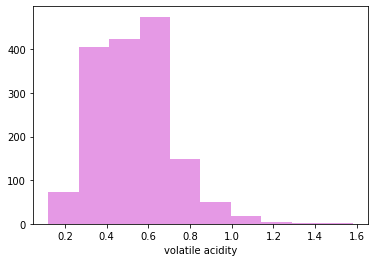

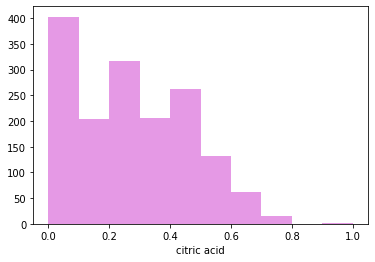

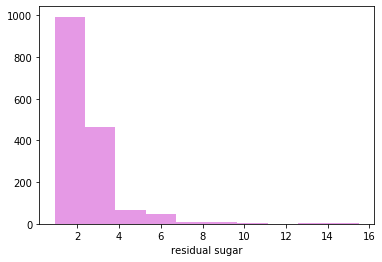

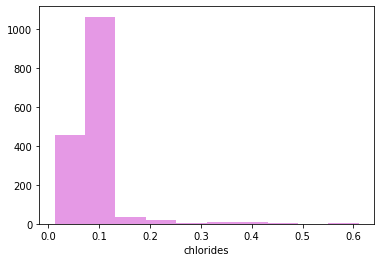

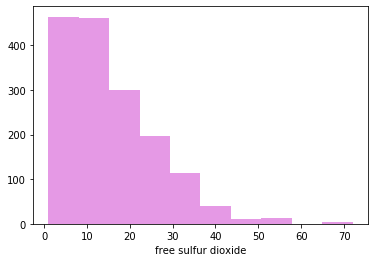

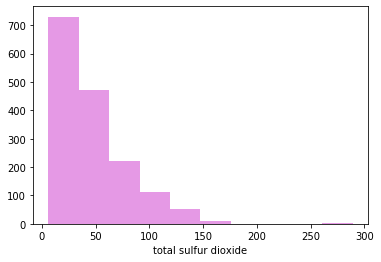

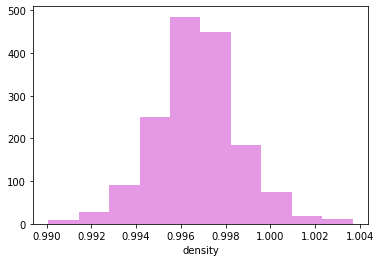

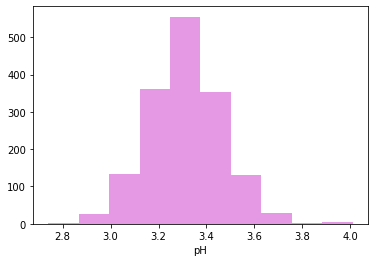

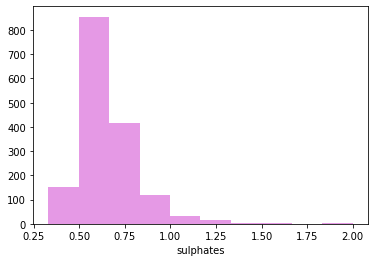

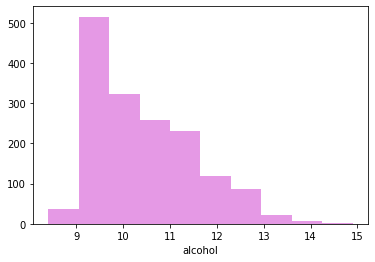

In [83]:
#plotiing histograms
for feature in X.columns:
    sns.distplot(X[feature] , kde = False , bins = 10 , color = 'm')
    plt.show()

Lets visualize the scatterplots too along with the respective histogram.

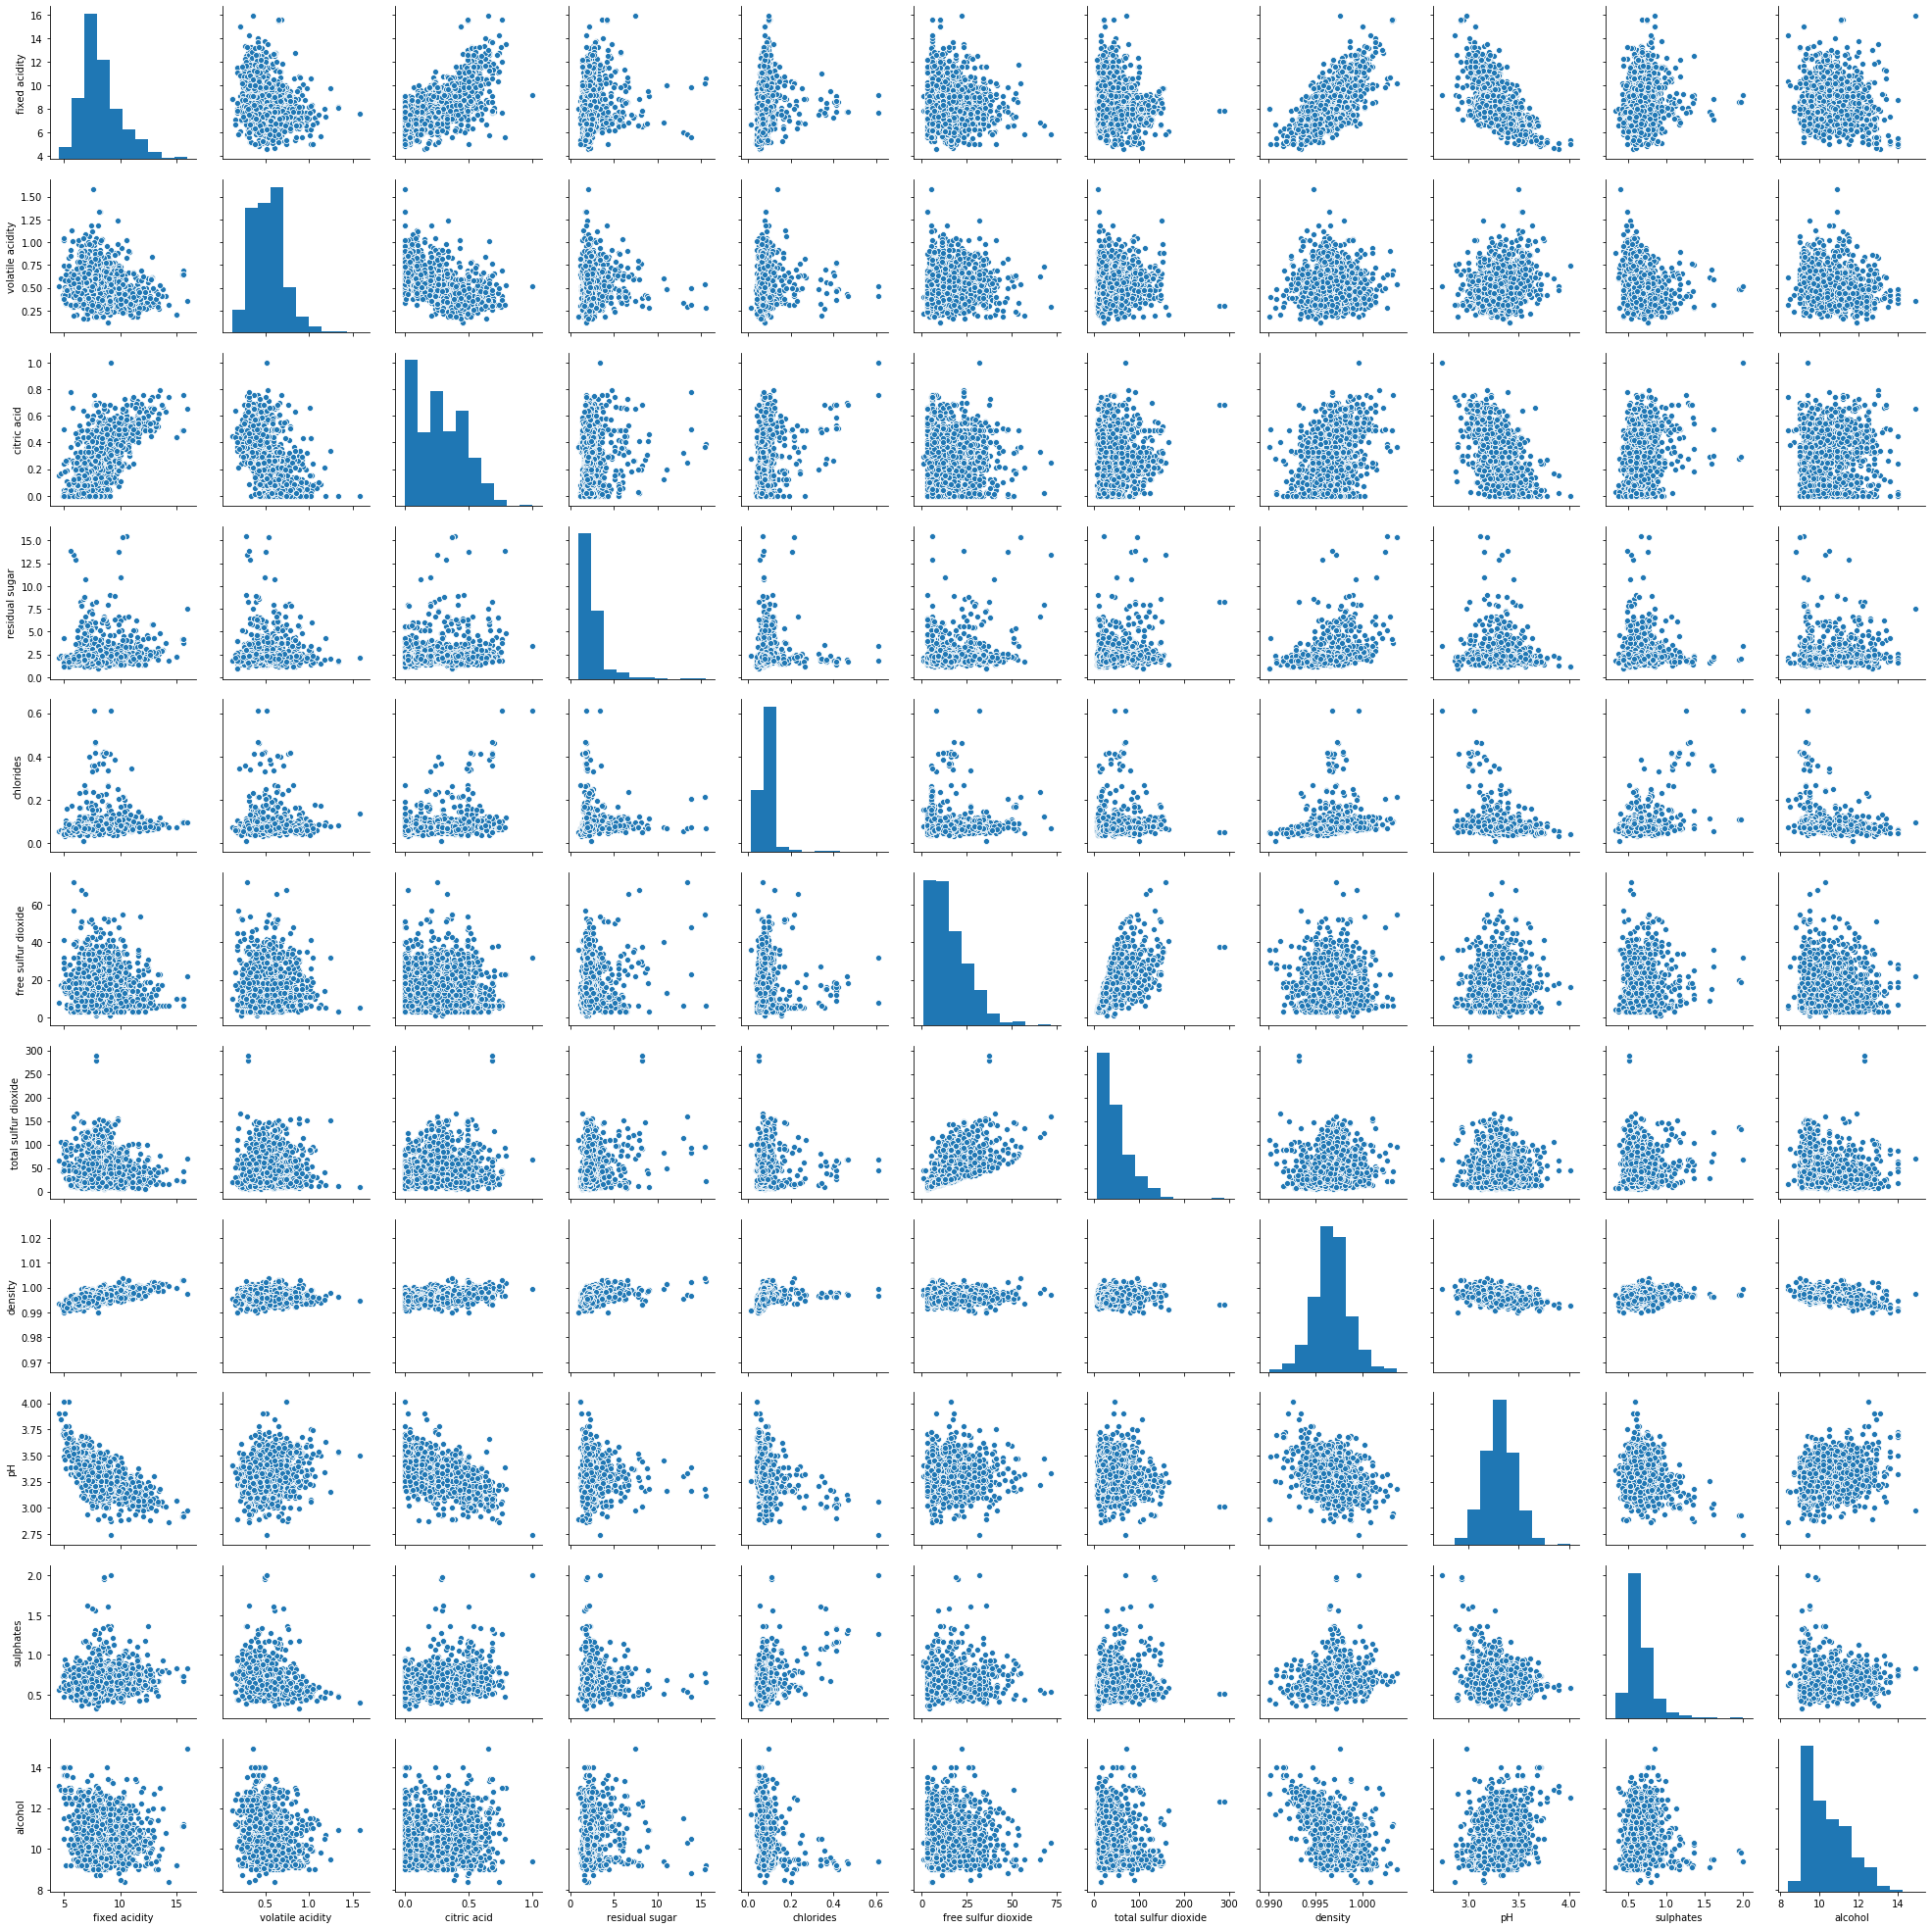

In [84]:
#plotting pairplot
sns.pairplot(X)
plt.show()

The histograms have some sort of skewness and need a bit of transformations.

We will implement a log transform on the skewed features to get a normalized version. The features which would get transformed are:

1. 'fixed acidity'
2. 'volatile acidity'
3. 'citric acid'
4. 'residual sugar'
5. 'chlorides'
6. 'free sulfur dioxide'
7. 'total sulphur dioxide'
8. 'sulphates'
9. 'alcohol'

Moreover lets check between features and see if there is a correlation between them.

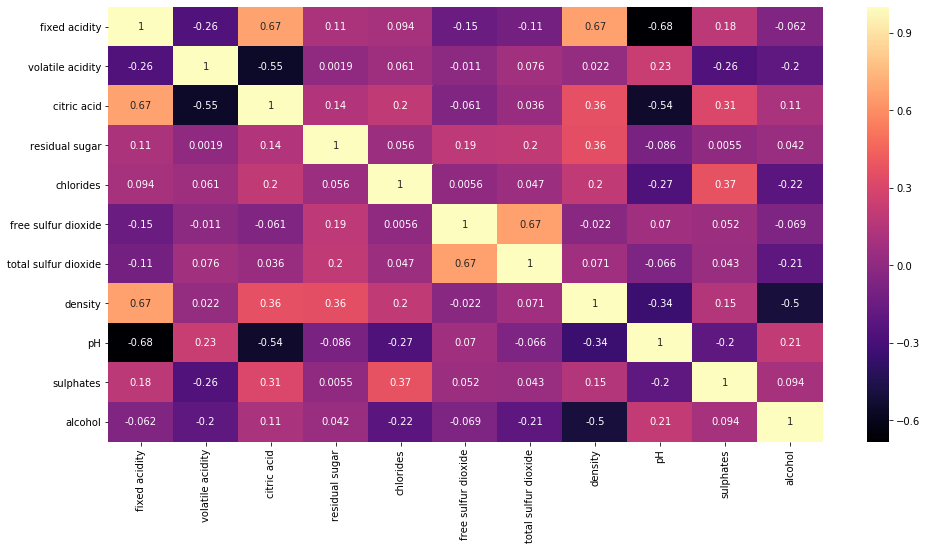

In [85]:
corr_matrix = X.corr()

plt.figure(figsize = (16 , 8))
ax = sns.heatmap(corr_matrix , annot = True , cmap = 'magma')
plt.ylim(len(corr_matrix) , 0)
plt.show()

The heatmaps shows some excellent results and magnifies some of the correlation between them. We need to analyze them more and make better features if needed. Lets see.

The majorly correlated ones are:

1. fixed acidity with citric acid , density and pH
2. volatile acidity with citric acid and pH
3. Citric acid with pH
4. free sulfur dioxide with total sulfur dioxide
5. alcohol with density

We will try to utilize these and try and find newer patterns with the output.

But first let's see the orientation of quality with features through barplots.

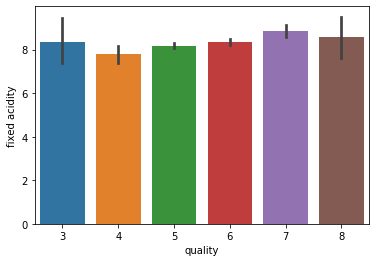

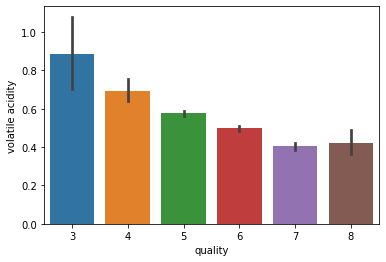

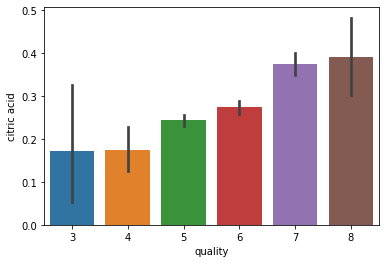

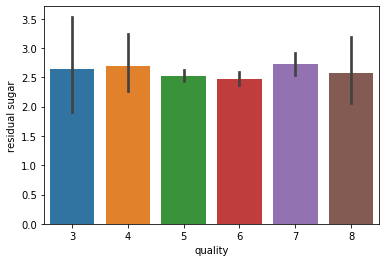

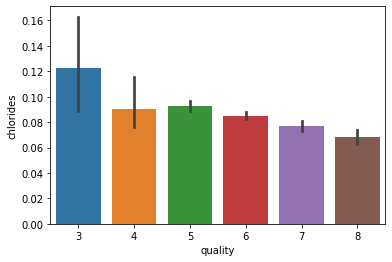

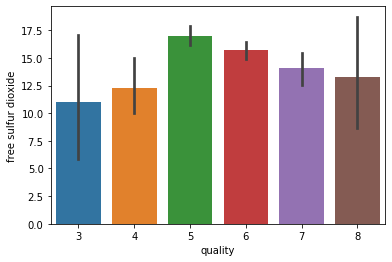

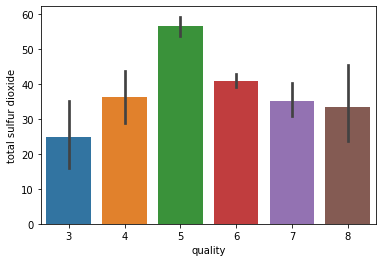

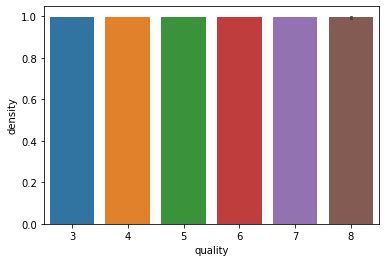

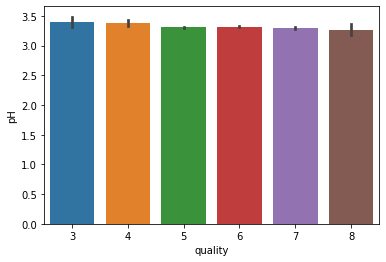

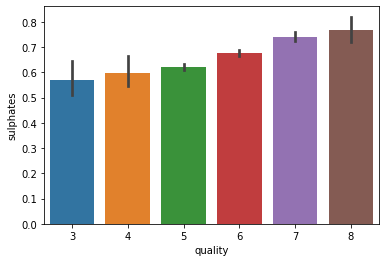

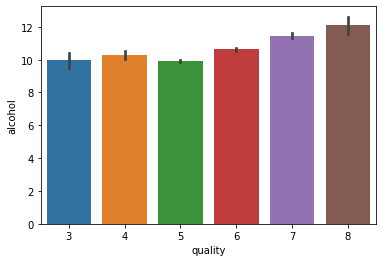

In [86]:
for col in X.columns: 
    sns.barplot(x = y , y = X[col] )
    plt.show()

A few important patterns could be seen and needs to be utilized.

1. Quality increase as volatile acidity decreases.
2. Quality increases as citric acid increases.
3. Quality increases with increase in sulfates.
4. Alcohol percentage also increases quality.

These 3 features surely needs to be considered.

Lets now make a few newer features and check their orientation with the output.

In [87]:
citric_by_fixed = X['citric acid'] / X['fixed acidity']
fixed_by_density = X['fixed acidity'] / X['density']
fixed_by_pH = X['fixed acidity'] / X['pH']

f = [citric_by_fixed , fixed_by_density , fixed_by_pH]
column_name = ['citric_by_fixed' , 'fixed_by_density' , 'fixed_by_pH']

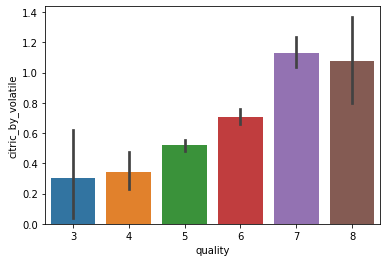

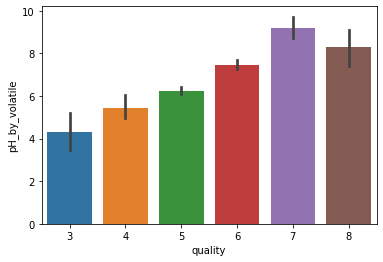

In [90]:
for index , item in enumerate(f):
    sns.barplot(x = y, y = item)
    plt.ylabel(column_name[index])
    plt.show()

Citric acid by fixed acid gives quite a prominent pattern with output.

In [91]:
citric_by_volatile = X['citric acid'] / X['volatile acidity']
pH_by_volatile = X['pH'] / X['volatile acidity']

f = [citric_by_volatile , pH_by_volatile]
column_name = ['citric_by_volatile' , 'pH_by_volatile']

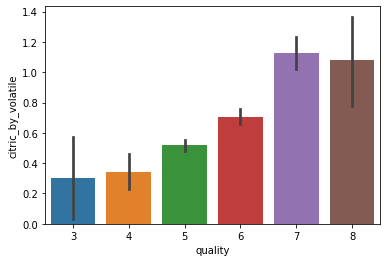

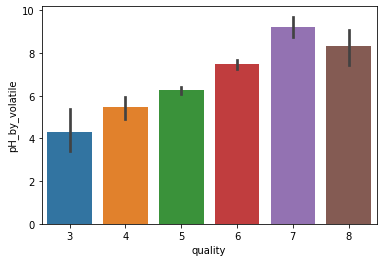

In [92]:
for index , item in enumerate(f):
    sns.barplot(x = y, y = item)
    plt.ylabel(column_name[index])
    plt.show()

Both the features show some patterns of their own.

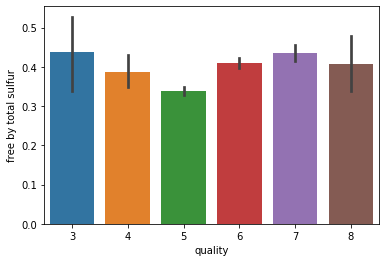

In [93]:
free_by_tot = X['free sulfur dioxide'] / X['total sulfur dioxide']

sns.barplot(x = y, y = free_by_tot)
plt.ylabel('free by total sulfur')
plt.show()

Not so much of resemblance.

In [94]:
alcohol_by_density = X['alcohol'] / X['density']

alcohol_to_density = X['alcohol'] * X['density']

alc_dens = [alcohol_by_density , alcohol_to_density]

columns = ['alcohol_by_density' , 'alcohol_to_density']

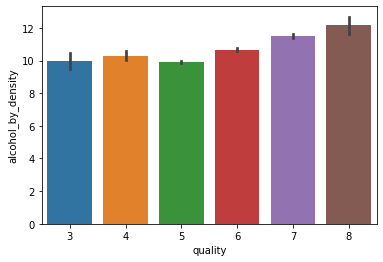

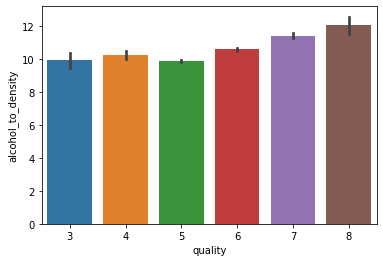

In [95]:
for index, item in enumerate(alc_dens):
    sns.barplot(x = y, y = item)
    plt.ylabel(columns[index])
    plt.show()

Now am gonna update the data based on the features I found reasonable.

I will be implementing with the help of the following models and pick the best one in the end.

1. Decision Trees
2. SVM
3. Random Forest

Lets make a new Dataframe with the selected features that I chose and also apply log normal transformation and scaling.

In [96]:
selected_wine_df = pd.DataFrame(wine_df[['volatile acidity' , 'citric acid' , 'sulphates' , 'alcohol']])
selected_wine_df.head()

,volatile acidity,citric acid,sulphates,alcohol
0,0.70,0.00,0.56,9.4
1,0.88,0.00,0.68,9.8
2,0.76,0.04,0.65,9.8
3,0.28,0.56,0.58,9.8
4,0.70,0.00,0.56,9.4


Now since we have curved out the selective features lets add our own created features to the dataset.

In [97]:
selected_wine_df['citric_by_fixed'] = citric_by_fixed
selected_wine_df['citric_by_volatile'] = citric_by_volatile
selected_wine_df['pH_by_volatile'] = pH_by_volatile

selected_wine_df

,volatile acidity,citric acid,sulphates,alcohol,citric_by_fixed,citric_by_volatile,pH_by_volatile
0,0.700,0.00,0.56,9.4,0.000000,0.000000,5.014286
1,0.880,0.00,0.68,9.8,0.000000,0.000000,3.636364
2,0.760,0.04,0.65,9.8,0.005128,0.052632,4.289474
3,0.280,0.56,0.58,9.8,0.050000,2.000000,11.285714
4,0.700,0.00,0.56,9.4,0.000000,0.000000,5.014286
...,...,...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,0.012903,0.133333,5.750000
1595,0.550,0.10,0.76,11.2,0.016949,0.181818,6.400000
1596,0.510,0.13,0.75,11.0,0.020635,0.254902,6.705882
1597,0.645,0.12,0.71,10.2,0.020339,0.186047,5.534884


Lets see the histograms of the features and then apply log transformation.

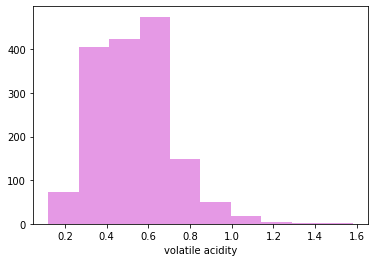

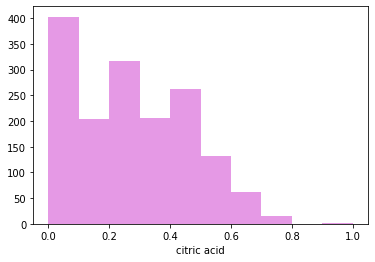

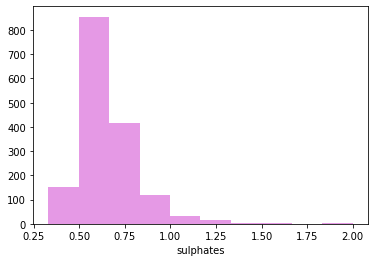

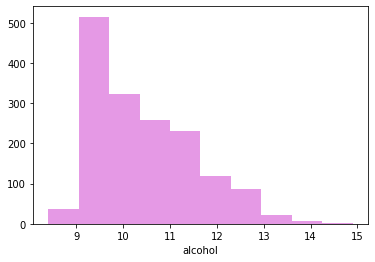

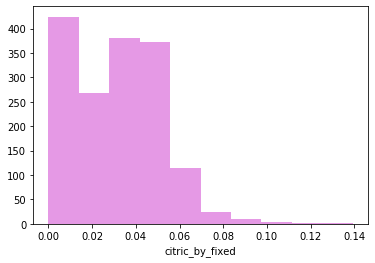

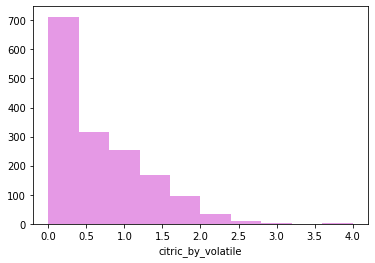

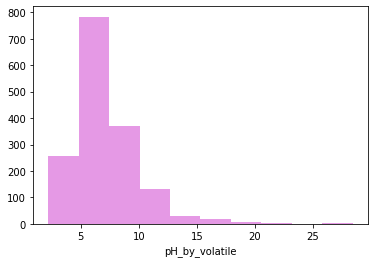

In [98]:
#plotiing histograms
for feature in selected_wine_df.columns:
    sns.distplot(selected_wine_df[feature] , kde = False , bins = 10 , color = 'm')
    plt.show()

Okay all of them needs a log transformation.

In [99]:
log_features = []
for feature in selected_wine_df.columns:
    if selected_wine_df[feature].values.all() != 0.0: 
        log_features.append(feature)

log_features

['volatile acidity', 'sulphates', 'alcohol', 'pH_by_volatile']

In [100]:
selected_wine_df['log volatile acidity'] = np.log(selected_wine_df['volatile acidity'])
selected_wine_df['log sulphates'] = np.log(selected_wine_df['sulphates'])
selected_wine_df['log alcohol'] = np.log(selected_wine_df['alcohol'])
selected_wine_df['log pH_by_volatile'] = np.log(selected_wine_df['pH_by_volatile'])

selected_wine_df

,volatile acidity,citric acid,sulphates,alcohol,citric_by_fixed,citric_by_volatile,pH_by_volatile,log volatile acidity,log sulphates,log alcohol,log pH_by_volatile
0,0.700,0.00,0.56,9.4,0.000000,0.000000,5.014286,-0.356675,-0.579818,2.240710,1.612291
1,0.880,0.00,0.68,9.8,0.000000,0.000000,3.636364,-0.127833,-0.385662,2.282382,1.290984
2,0.760,0.04,0.65,9.8,0.005128,0.052632,4.289474,-0.274437,-0.430783,2.282382,1.456164
3,0.280,0.56,0.58,9.8,0.050000,2.000000,11.285714,-1.272966,-0.544727,2.282382,2.423538
4,0.700,0.00,0.56,9.4,0.000000,0.000000,5.014286,-0.356675,-0.579818,2.240710,1.612291
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,0.012903,0.133333,5.750000,-0.510826,-0.544727,2.351375,1.749200
1595,0.550,0.10,0.76,11.2,0.016949,0.181818,6.400000,-0.597837,-0.274437,2.415914,1.856298
1596,0.510,0.13,0.75,11.0,0.020635,0.254902,6.705882,-0.673345,-0.287682,2.397895,1.902985
1597,0.645,0.12,0.71,10.2,0.020339,0.186047,5.534884,-0.438505,-0.342490,2.322388,1.711071


In [106]:
my_wine = selected_wine_df.drop(labels = ['volatile acidity', 'sulphates', 'alcohol', 'pH_by_volatile'] , axis = 1)

my_wine

,citric acid,citric_by_fixed,citric_by_volatile,log volatile acidity,log sulphates,log alcohol,log pH_by_volatile
0,0.00,0.000000,0.000000,-0.356675,-0.579818,2.240710,1.612291
1,0.00,0.000000,0.000000,-0.127833,-0.385662,2.282382,1.290984
2,0.04,0.005128,0.052632,-0.274437,-0.430783,2.282382,1.456164
3,0.56,0.050000,2.000000,-1.272966,-0.544727,2.282382,2.423538
4,0.00,0.000000,0.000000,-0.356675,-0.579818,2.240710,1.612291
...,...,...,...,...,...,...,...
1594,0.08,0.012903,0.133333,-0.510826,-0.544727,2.351375,1.749200
1595,0.10,0.016949,0.181818,-0.597837,-0.274437,2.415914,1.856298
1596,0.13,0.020635,0.254902,-0.673345,-0.287682,2.397895,1.902985
1597,0.12,0.020339,0.186047,-0.438505,-0.342490,2.322388,1.711071


Lets check the histograms

In [107]:
my_wine.columns

Index(['citric acid', 'citric_by_fixed', 'citric_by_volatile',
       'log volatile acidity', 'log sulphates', 'log alcohol',
       'log pH_by_volatile'],
      dtype='object')

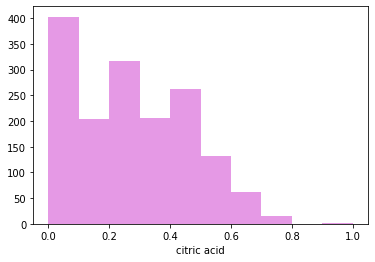

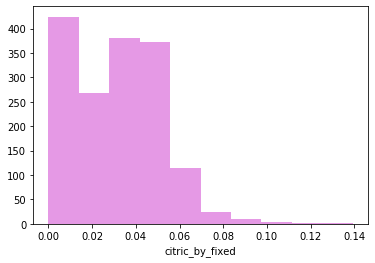

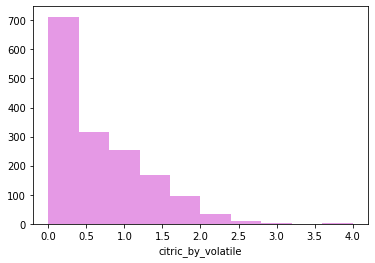

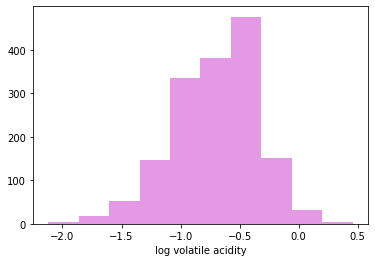

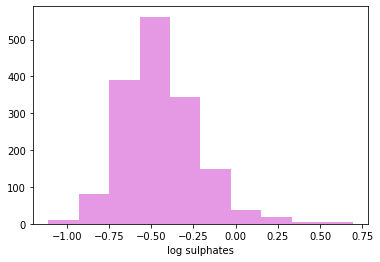

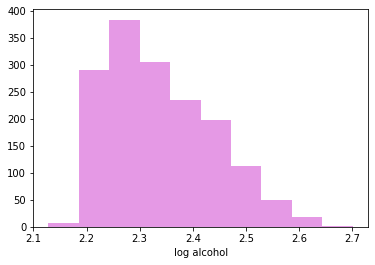

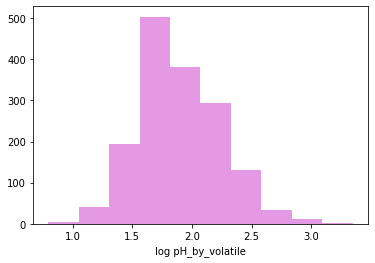

In [108]:
for feature in my_wine.columns:
    sns.distplot(my_wine[feature] , kde = False , bins = 10 , color = 'm')
    plt.show()

All the log-transformed values are now normally-distributed.

Now lets scale our values.

In [109]:
min_max = MinMaxScaler()

In [111]:

my_wine[['citric acid', 'citric_by_fixed', 'citric_by_volatile','log pH_by_volatile', 'log volatile acidity', 'log sulphates',
       'log alcohol', 'log pH_by_volatile']] = min_max.fit_transform(my_wine[['citric acid', 'citric_by_fixed', 'citric_by_volatile',
       'log pH_by_volatile', 'log volatile acidity', 'log sulphates',
       'log alcohol', 'log pH_by_volatile']])

my_wine

,citric acid,citric_by_fixed,citric_by_volatile,log volatile acidity,log sulphates,log alcohol,log pH_by_volatile
0,0.00,0.000000,0.000000,0.684174,0.293507,0.196252,0.320168
1,0.00,0.000000,0.000000,0.772952,0.401263,0.268963,0.194246
2,0.04,0.036818,0.013158,0.716078,0.376222,0.268963,0.258981
3,0.56,0.358974,0.500000,0.328705,0.312983,0.268963,0.638100
4,0.00,0.000000,0.000000,0.684174,0.293507,0.196252,0.320168
...,...,...,...,...,...,...,...
1594,0.08,0.092639,0.033333,0.624373,0.312983,0.389342,0.373823
1595,0.10,0.121686,0.045455,0.590617,0.462993,0.501950,0.415796
1596,0.13,0.148148,0.063725,0.561324,0.455642,0.470511,0.434093
1597,0.12,0.146023,0.046512,0.652429,0.425224,0.338765,0.358880


Now lets MODEL our data by first splitting the data into train and validation data.

## Step 3: Splitting the train and test data

In [114]:
X_train , X_test , y_train , y_test = train_test_split(my_wine , y , test_size = 0.2 , random_state = 33)

Now lets form our model.

## Step 4: Model Building and Training

First lets get the best parameters by utilizing GridSearchCV.

In [140]:
params1 = [{'C' : [0.1 , 0.3 , 0.9 ],
           'kernel' : ['poly', 'rbf' , 'sigmoid']}]
gs1 = GridSearchCV(SVC(gamma = 'auto'),
                   params1,
                   cv = 5,
                   )

gs1.fit(X_train , y_train)

gs1.best_estimator_

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
#Lets build our SVM model

svc = SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svc.fit(X_train , y_train)

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [153]:
y_train_pred = svc.predict(X_train)
print('---Train Precision Result---\n' , precision_score(y_train , y_train_pred , average = 'weighted'))
print('---Train Recall Result---\n' , recall_score(y_train , y_train_pred , average = 'weighted'))
print('---Train F1-score Result---\n' , f1_score(y_train , y_train_pred , average = 'weighted'))
print('---Train Accuracy Result---\n' , accuracy_score(y_train , y_train_pred ))

---Train Precision Result---
 0.4584832655411336
---Train Recall Result---
 0.563721657544957
---Train F1-score Result---
 0.5033015912309369
---Train Accuracy Result---
 0.563721657544957


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [154]:
y_test_pred = svc.predict(X_test)
print('---Test Precision Result---\n' , precision_score(y_test , y_test_pred , average = 'weighted'))
print('---Test Recall Result---\n' , recall_score(y_test , y_test_pred , average = 'weighted'))
print('---Test F1-score Result---\n' , f1_score(y_test , y_test_pred , average = 'weighted'))
print('---Test Accuracy Result---\n' , accuracy_score(y_test , y_test_pred ))

---Test Precision Result---
 0.49182327108719726
---Test Recall Result---
 0.590625
---Test F1-score Result---
 0.53611285814116
---Test Accuracy Result---
 0.590625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Okay the model was okay!
Lets try decision trees and random forest.

In [157]:
params2 = [{'criterion' : ['gini' , 'entropy'],
            'splitter' : ['best' , 'random' ]}]
gs2 = GridSearchCV(DecisionTreeClassifier(),
                   params2,
                   cv = 5,
                   )

gs2.fit(X_train , y_train)

gs2.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [158]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
dt.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
y_dt_pred = dt.predict(X_train)
print('---Train Precision Result---\n' , precision_score(y_train , y_dt_pred , average = 'weighted'))
print('---Train Recall Result---\n' , recall_score(y_train , y_dt_pred , average = 'weighted'))
print('---Train F1-score Result---\n' , f1_score(y_train , y_dt_pred , average = 'weighted'))
print('---Train Accuracy Result---\n' , accuracy_score(y_train , y_dt_pred ))

---Train Precision Result---
 1.0
---Train Recall Result---
 1.0
---Train F1-score Result---
 1.0
---Train Accuracy Result---
 1.0


In [160]:
y_dt_test_pred = dt.predict(X_test)
print('---Test Precision Result---\n' , precision_score(y_test , y_dt_test_pred , average = 'weighted'))
print('---Test Recall Result---\n' , recall_score(y_test , y_dt_test_pred , average = 'weighted'))
print('---Test F1-score Result---\n' , f1_score(y_test , y_dt_test_pred , average = 'weighted'))
print('---Test Accuracy Result---\n' , accuracy_score(y_test , y_dt_test_pred ))

---Test Precision Result---
 0.5679160366660367
---Test Recall Result---
 0.571875
---Test F1-score Result---
 0.5687734727347273
---Test Accuracy Result---
 0.571875


In [162]:
params3 = [{'criterion' : ['gini' , 'entropy'],
            'class_weight' : ['balanced' ]}]
gs3 = GridSearchCV(RandomForestClassifier(n_estimators = 10),
                   params3,
                   cv = 5)

gs3.fit(X_train , y_train)
gs3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [163]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
rf.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [164]:
y_rf_pred = rf.predict(X_train)
print('---Train Precision Result---\n' , precision_score(y_train , y_rf_pred , average = 'weighted'))
print('---Train Recall Result---\n' , recall_score(y_train , y_rf_pred , average = 'weighted'))
print('---Train F1-score Result---\n' , f1_score(y_train , y_rf_pred , average = 'weighted'))
print('---Train Accuracy Result---\n' , accuracy_score(y_train , y_rf_pred ))

---Train Precision Result---
 0.9906704254865112
---Train Recall Result---
 0.9906176700547302
---Train F1-score Result---
 0.9905830131035648
---Train Accuracy Result---
 0.9906176700547302


In [165]:
y_rf_test_pred = rf.predict(X_test)
print('---Test Precision Result---\n' , precision_score(y_test , y_rf_test_pred , average = 'weighted'))
print('---Test Recall Result---\n' , recall_score(y_test , y_rf_test_pred , average = 'weighted'))
print('---Test F1-score Result---\n' , f1_score(y_test , y_rf_test_pred , average = 'weighted'))
print('---Test Accuracy Result---\n' , accuracy_score(y_test , y_rf_test_pred ))

---Test Precision Result---
 0.613607410533513
---Test Recall Result---
 0.63125
---Test F1-score Result---
 0.6209300927699538
---Test Accuracy Result---
 0.63125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Well my selected features weren't that good for prediction and the RF was the best among the all.

Lets now select based on the Recursive Feature Elimination.

But first bring in our old dataframe and then readjust the training and testing sets.

In [171]:
train_features , test_features , train_labels , test_labels = train_test_split(X , y , test_size = 0.2 , random_state = 33)

In [174]:
params4 = [{'criterion' : ['gini' , 'entropy'],
            'class_weight' : ['balanced' ]}]
gs4 = GridSearchCV(RandomForestClassifier(n_estimators = 10),
                   params3,
                   cv = 5)

gs4.fit(train_features , train_labels)
gs4.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Optimal number of features : 10


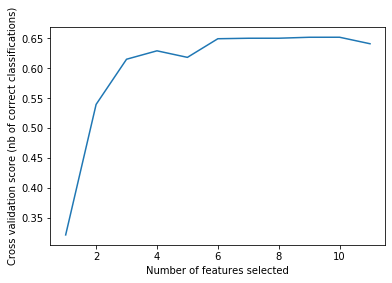

In [175]:
new_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

rfecv1 = RFECV(new_rf , scoring = 'accuracy' , cv = 5)

rfecv1.fit(train_features, train_labels)

print("Optimal number of features : %d" % rfecv1.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_)
plt.show()

In [185]:
ext_features = train_features[train_features.columns[rfecv1.ranking_ == 1]]

ext_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
373,7.4,0.550,0.22,2.2,0.106,72.0,0.99590,3.05,0.63,9.2
1150,8.2,0.330,0.32,2.8,0.067,12.0,0.99473,3.30,0.76,12.8
833,11.6,0.470,0.44,1.6,0.147,51.0,0.99836,3.38,0.86,9.9
727,6.4,0.570,0.02,1.8,0.067,11.0,0.99700,3.46,0.68,9.5
318,9.8,0.660,0.39,3.2,0.083,59.0,0.99890,3.37,0.71,11.5
...,...,...,...,...,...,...,...,...,...,...
1225,9.2,0.460,0.23,2.6,0.091,77.0,0.99922,3.15,0.51,9.4
658,7.2,0.520,0.07,1.4,0.074,20.0,0.99730,3.32,0.81,9.6
578,8.8,0.470,0.49,2.9,0.085,110.0,0.99820,3.29,0.60,9.8
391,13.7,0.415,0.68,2.9,0.085,43.0,1.00140,3.06,0.80,10.0


In [186]:
ext_test_features = test_features[train_features.columns[rfecv1.ranking_ == 1]]

In [187]:
new_rf.fit(ext_features , train_labels)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [189]:
y_rf1_pred = new_rf.predict(ext_features)
print('---Train Precision Result---\n' , precision_score(train_labels , y_rf1_pred , average = 'weighted'))
print('---Train Recall Result---\n' , recall_score(train_labels , y_rf1_pred , average = 'weighted'))
print('---Train F1-score Result---\n' , f1_score(train_labels , y_rf1_pred , average = 'weighted'))
print('---Train Accuracy Result---\n' , accuracy_score(train_labels , y_rf1_pred ))

---Train Precision Result---
 0.9883024298406422
---Train Recall Result---
 0.9882720875684128
---Train F1-score Result---
 0.9882216310034141
---Train Accuracy Result---
 0.9882720875684128


In [193]:
y_test_rf1_pred = new_rf.predict(ext_test_features)

print('---Train Accuracy Result---\n' , accuracy_score(test_labels , y_test_rf1_pred))

---Train Accuracy Result---
 0.65625


We are able to get a training accuracy of 